In [57]:
import pandas
from sqlalchemy import select, inspect
from models import Works, Tags, engine
from sqlalchemy.orm import Session
import sqlite3
from constants import TAG_TYPES
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'matplotlib'

In [58]:
stmt = select(Tags.title, Works.last_updated).join(Tags).where(Tags.type == TAG_TYPES['character'])
with engine.connect() as conn, conn.begin():
    sqldata = conn.execute(stmt).mappings().all()
    data = pandas.read_sql(stmt, conn)
data['count'] = 1


    

2023-03-20 20:04:57,652 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-03-20 20:04:57,653 INFO sqlalchemy.engine.Engine SELECT tags.title, works.last_updated 
FROM works JOIN tags ON works.id = tags.work_id 
WHERE tags.type = ?
2023-03-20 20:04:57,654 INFO sqlalchemy.engine.Engine [cached since 4.339e+05s ago] (1,)
2023-03-20 20:04:57,656 INFO sqlalchemy.engine.Engine SELECT tags.title, works.last_updated 
FROM works JOIN tags ON works.id = tags.work_id 
WHERE tags.type = ?
2023-03-20 20:04:57,656 INFO sqlalchemy.engine.Engine [cached since 4.339e+05s ago] (1,)
2023-03-20 20:04:57,658 INFO sqlalchemy.engine.Engine COMMIT


In [49]:
summary = data[['title', 'count']].groupby('title').count()

<Axes: xlabel='title'>

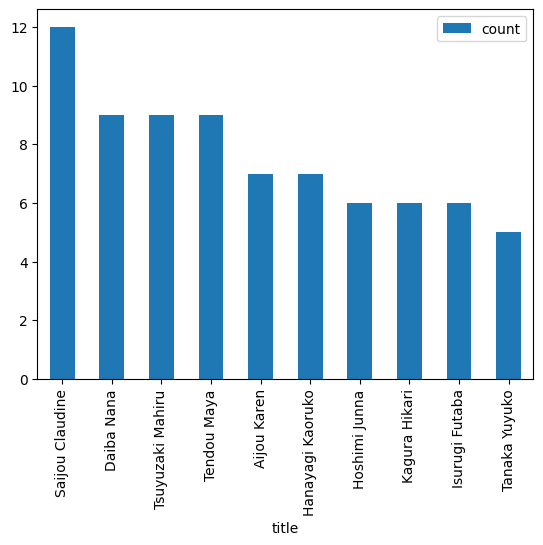

In [60]:
graph_data = summary.sort_values(by='count', ascending=False).head(10)
graph_data.plot.bar()